# Introduction

Prediction model for finding whether the tumour is malignant or benign using Keras



## The Data

### Breast Cancer Wisconsin (Diagnostic) Dataset
--------------------------------------------

**Data Set Characteristics:**

    Number of Instances: 569

    Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('cancer_classification.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

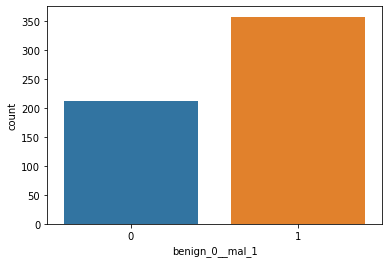

In [31]:
sns.countplot(x='benign_0__mal_1',data=df)

This looks to be relatively well balanced.

So we definitely have more cases of malignant tumors in this particular dataset.But the difference is not extreme here.

Then what else we can do is check out the correlation between the features themselves

In [32]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

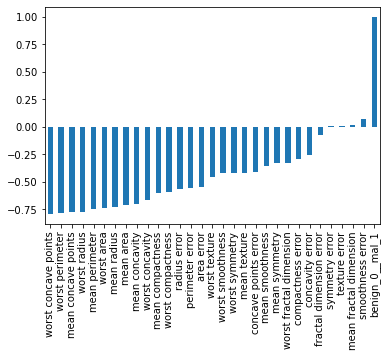

In [33]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

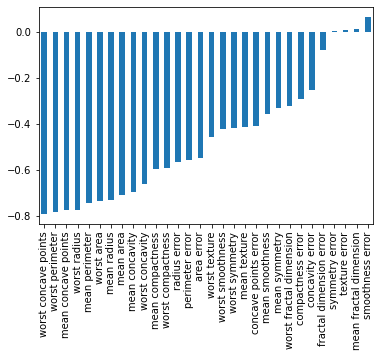

In [34]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')   #dropping the label column

<AxesSubplot:>

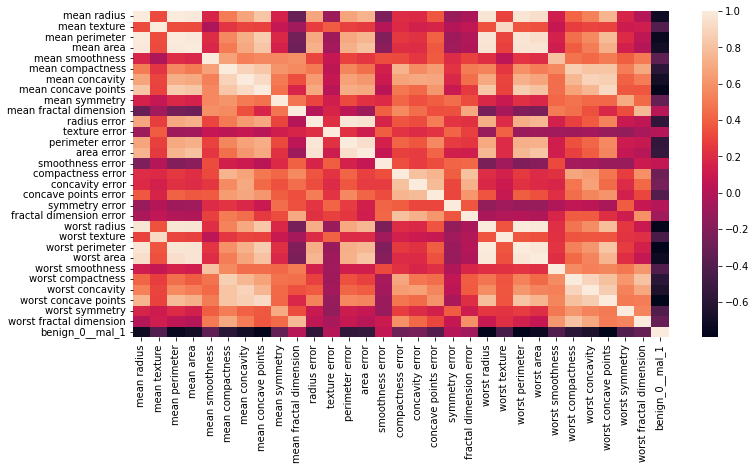

In [79]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr())

## Train Test Split

In [36]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(X_train)

MinMaxScaler()

In [42]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [44]:
X_train.shape

(426, 30)

So right now in my training set, I have 426 rows, so not a whole lot of rows and then 30 features.

So what I will do is I will create a sequential model.And then I will add in A first layer Of 30 neurons

And then the activation will just be a rectified linear unit(relu) and then we will repeat that.

We'll go ahead and cut that in half so the next layer will go down to 15 and we'll keep things

simple so that we have one last output layer.

However, the activation and the critical will be sigmoid because this is a binary classification problem.

So for a binary classification problem, we want the last activation to be sigmoid.

In [45]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))  

#So we have minor classification, one neuron outputting something between a zero and one, 
#and that will decide what class this belongs to, either malignant or benign.

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

I'm going to choose a really large number of epochs here and overfit the model

In [46]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 0.6826 - val_loss: 0.6681
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6549 - val_loss: 0.6474
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6332 - val_loss: 0.6249
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.5981
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5791 - val_loss: 0.5670
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5444 - val_loss: 0.5276
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5034 - val_loss: 0.4849
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4599 - val_loss: 0.4389
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4167 - val_loss: 0.3932
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3766 - val_loss: 0.3518
Epoch 11

we'll go ahead and plot out the loss and remember we are passing our validation

data during the training.So we'll be able to plot out both the training loss and the validation loss.

In [47]:
# model.history.history

In [48]:
model_loss = pd.DataFrame(model.history.history)

In [49]:
# model_loss

<AxesSubplot:>

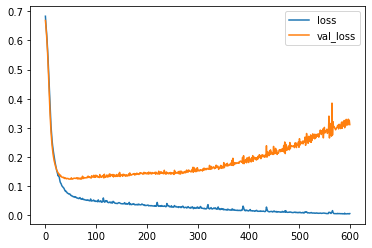

In [50]:
model_loss.plot()

You'll notice in the beginning, during the first couple of epochs, both validation and trading loss are both decreasing.

And as we go along, we're decreasing loss in both the validation set and the training set.

However, at a certain point of time, notice that our training loss here in blue is still going down.

However, our validation loss is beginning to increase.

That basically tells us that we're overfitting to our training data set.

So we have a clear indication here that we're training just for too many epochs notice the validation

loss gets worse and worse after these epochs.

So what we're going to do is we're going to see if we can use early stopping.

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [51]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6883 - val_loss: 0.6677
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6510 - val_loss: 0.6350
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6177 - val_loss: 0.6028
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5832 - val_loss: 0.5702
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5464 - val_loss: 0.5273
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5015 - val_loss: 0.4844
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4610 - val_loss: 0.4428
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4217 - val_loss: 0.4015
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3867 - val_loss: 0.3621
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3488 - val_loss: 0.3307
Epoch 11

<AxesSubplot:>

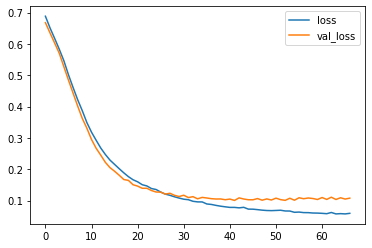

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

And this is exactly the kind of plot that we want to see or loss and validation loss are both beginning to go down and 

right as they begin to spread out, that's probably a good indication of where we should stop training.

So notice this flattening out.

## Example Three: Adding in DropOut Layers

So the third thing we can do is try to help prevent overfitting is add in drop out layers.

So drop out layers will essentially turn off a percentage of neurons randomly.

In [56]:
from tensorflow.keras.layers import Dropout

In [57]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [58]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.8544 - val_loss: 0.7724
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7840 - val_loss: 0.7265
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7171 - val_loss: 0.6970
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6822 - val_loss: 0.6766
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6758 - val_loss: 0.6563
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6832 - val_loss: 0.6354
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6470 - val_loss: 0.6148
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6410 - val_loss: 0.5925
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6103 - val_loss: 0.5694
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5740 - val_loss: 0.5404
Epoch 11

<AxesSubplot:>

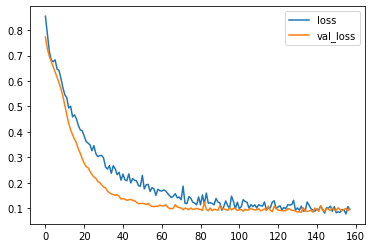

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Note that the training laws and the validation laws are both quickly going down and they essentially

are flattening out at the same rate.

# Model Evaluation

In [60]:
 (model.predict(X_test)>0.5).astype('int32')

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [61]:
predictions = (model.predict(X_test)>0.5).astype('int32')

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [64]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


### Created by Pothula Sreevarshini
